In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("steam_games.csv")

C:\Users\jazmin\AppData\Local\Temp\ipykernel_12920\4264565917.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("steam_games.csv")


In [3]:
df.head()

,Unnamed: 0,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Dropeo la columna "Unnamed: 0" y las filas que tienen nulos en todos sus valores.
df = df.drop(columns="Unnamed: 0")
df = df.dropna(how='all')

In [5]:
df.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0.0,643980.0,Secret Level SRL
88312,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0.0,670290.0,Poolians.com
88313,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,0.0,767400.0,彼岸领域
88314,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN


In [6]:
df.isnull().sum()

publisher       8071
genres          3283
app_name           2
title           2050
url                0
release_date    2067
tags             163
reviews_url        2
specs            670
price           1377
early_access       0
id                 2
developer       3299
dtype: int64

In [7]:
#Dropeo las columnas que no me sirven para el análisis

df = df.drop(columns=["app_name","publisher","tags","reviews_url","specs","early_access","url"])

In [8]:
df.isnull().sum()

genres          3283
title           2050
release_date    2067
price           1377
id                 2
developer       3299
dtype: int64

In [9]:
#Reemplazo los valores faltantes de developer por "Unknown"
df["developer"] = df["developer"].fillna('Unknown')

In [10]:
df.isnull().sum()

genres          3283
title           2050
release_date    2067
price           1377
id                 2
developer          0
dtype: int64

In [11]:
#Me quedaron poco valores nulos así que dropeo el resto
df = df.dropna()
df.shape

(27617, 6)

In [12]:
df.dtypes

genres           object
title            object
release_date     object
price            object
id              float64
developer        object
dtype: object

In [13]:
#Cambio los data types de algunas columnas

df[['title', 'developer']] = df[['title', 'developer']].astype(str)
df['id'] = df['id'].astype(int)
df['price'] = df['price'].astype(float)

ValueError: could not convert string to float: 'Free To Play'

In [14]:
#Parece haber columnas con valores string en price por lo que los reemplazo por 0.0 ya que refieren a contenido FREE.

def is_float(value): #Función que detecta valores que no son float.
    try:
        float(value)
        return True
    except ValueError:
        return False

#Ahora si hago el cambio de datatypes.

df['price'] = df['price'].apply(lambda x: float(x) if is_float(x) else 0.0)
df['price'] = df['price'].astype(float)
df[['title', 'developer']] = df[['title', 'developer']].astype(str)
df['id'] = df['id'].astype(int)

In [15]:
df.iloc[20:40]

,genres,title,release_date,price,id,developer
88338,['Action'],Half-Life,1998-11-08,9.99,70,Valve
88339,"['Action', 'Indie', 'RPG']",Fallen Mage,2016-11-25,1.99,752360,dev4play
88343,"['Casual', 'Indie', 'Simulation']",Vaporwave Simulator,2018-01-01,0.99,766850,ETGgames
88347,"['Action', 'Adventure', 'RPG']",Underdone - Soundtrack,2018-01-01,8.99,754360,The Commander
88348,"['Adventure', 'Casual', 'Indie', 'RPG']",Bitcoin Clicker,2018-01-01,0.99,716110,"lalalaZero,Urbanoff"
88349,['Strategy'],Disciples II: Gallean's Return,2006-07-06,6.99,1640,Strategy First
88350,['Strategy'],Disciples II: Rise of the Elves,2006-07-06,6.99,1630,Strategy First
88351,"['Action', 'Indie', 'RPG']",The Ship: Murder Party,2006-07-11,9.99,2400,Outerlight Ltd.
88356,"['Action', 'Indie', 'Strategy', 'Early Access']",Souland,2017-12-29,7.99,759920,Ultraint
88358,"['Action', 'Adventure', 'Indie', 'RPG']",TAROTICA VOO DOO,2017-12-29,10.99,603280,TPM.CO SOFT WORKS


## Análisis de variables numéricas

In [16]:
df["price"].describe()

count    27617.000000
mean         9.004576
std         15.956906
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

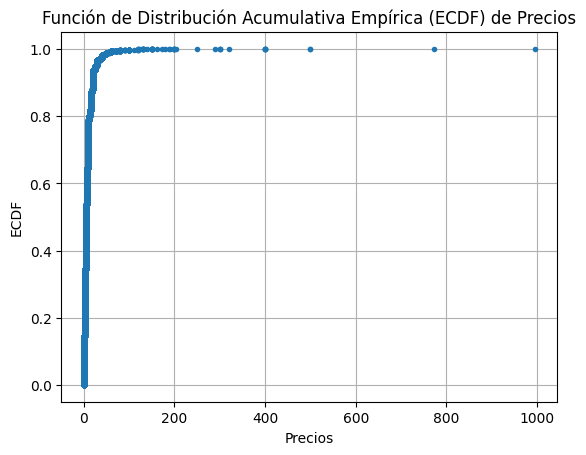

In [17]:
#Probé con varios plots pero al estar la mayoría de valores en un rango pequeño no me revelaban mucho pero encontré este gráfico que sirve bastante bien.

precios = df['price']
precios_ordenados = np.sort(precios)

plt.plot(precios_ordenados, np.arange(1, len(precios_ordenados) + 1) / len(precios_ordenados), marker='.', linestyle='none')
plt.xlabel('Precios')
plt.ylabel('ECDF')
plt.title('Función de Distribución Acumulativa Empírica (ECDF) de Precios')
plt.grid(True)
plt.show()

In [18]:
df["price"].value_counts()

price
4.99      3860
9.99      3584
2.99      3178
0.99      2478
1.99      2251
          ... 
4.68         1
131.40       1
44.98        1
202.76       1
160.91       1
Name: count, Length: 135, dtype: int64

In [19]:
#Parecen haber valores demasiado elevados por lo que chequié en la database de steam y hay algunos juegos que pude encontrar un 
#un precio real mas bajo por lo que los cambié manualmente.
df[df["price"]>250]

,genres,title,release_date,price,id,developer
90702,['Simulation'],X-Plane 10 Global - 64 Bit,2014-07-14,771.71,292180,Laminar Research
92755,"['Animation &amp; Modeling', 'Design &amp; Ill...",MODO indie 10,2015-09-24,299.99,401090,The Foundry
97384,"['Animation &amp; Modeling', 'Design &amp; Ill...",GameMaker Studio 2 Mobile,2017-03-08,399.99,585620,YoYo Games Ltd.
97385,"['Animation &amp; Modeling', 'Design &amp; Ill...",GameMaker Studio 2 UWP,2017-03-08,399.99,585610,YoYo Games Ltd.
97727,['Video Production'],MAGIX Video Pro X8 Steam Edition,2017-04-11,399.00,598860,MAGIX Software GmbH
100045,"['Animation &amp; Modeling', 'Design &amp; Ill...",Marvelous Designer 7 For Steam,2017-09-28,320.00,707410,CLO Virtual Fashion
100398,"['Animation &amp; Modeling', 'Design &amp; Ill...",Strata Spaces VR – Professional Edition Upgrade,2017-10-26,995.00,719000,"Strata Mixed Reality, Inc."
102065,['Video Production'],MAGIX Video Pro X9 Steam Edition,2017-11-28,399.00,750840,MAGIX Software GmbH
102614,"['Animation &amp; Modeling', 'Design &amp; Ill...",CUR3D Maker Edition - Permission for commercia...,2017-11-06,499.99,691560,RUHRSOURCE GmbH
104156,"['Audio Production', 'Video Production']",VEGAS Pro 15 Edit Steam Edition,2017-09-05,399.00,689790,MAGIX Software GmbH


In [20]:
df.loc[90702, 'price'] = 19.99
df.loc[92755, 'price'] = 14.99
df.loc[97384, 'price'] = 74.99
df.loc[97385, 'price'] = 74.99
df.loc[97727, 'price'] = 79.80
df.loc[100045, 'price'] = 199.99
df.loc[102614, 'price'] = 199.99
df.loc[104156, 'price'] = 78.98
df.loc[105948, 'price'] = 149.99
df.loc[115162, 'price'] = 19.99
df.loc[97384, 'price'] = 74.99
df.loc[97384, 'price'] = 74.99


In [21]:
#Me quedo con los valores de precio menores a 200 para hacer mas análisis.
df = df[df['price'] <= 200]

In [24]:
sns.boxplot(y="price")
plt.ylabel('Price')
plt.title('Box Plot of Prices')
plt.show()

ValueError: Could not interpret input 'price'

## Análisis de variables categóricas

In [25]:
#Desgloso los valores de la columna genres
genres = df['genres'].str.split(',').explode().str.strip()
genres = genres.str.replace(r"[\[\]']", '', regex=True)

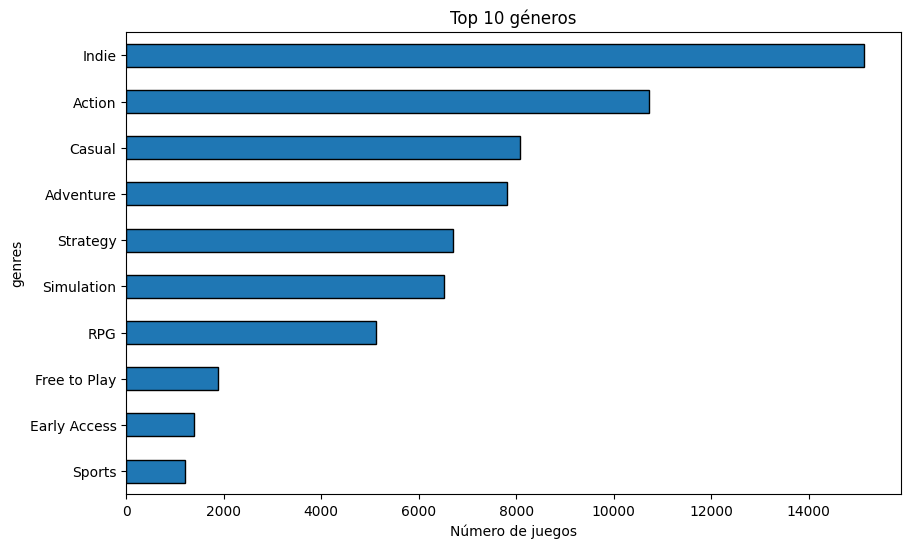

In [26]:
#Cuento cuantos juegos hay para cada género y hago un ranking.
genres_count = genres.value_counts()
plt.figure(figsize=(10, 6))
genres_count.head(10).sort_values().plot(kind='barh',edgecolor='black')
plt.xlabel('Número de juegos')
plt.title('Top 10 géneros')
plt.show()

In [27]:
#Creo una columna de año para hacer análisis temporal.

df['release_year'] = pd.to_datetime(df['release_date']).dt.year

ValueError: time data "Jun 2009" doesn't match format "%Y-%m-%d", at position 220. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [28]:
#Parece haber valores con formato incorrecto por lo que los selecciono para ver si son muchos.
patrón = r'^\d{4}-\d{2}-\d{2}$'
fechas_inválidas = df[~df['release_date'].str.match(patrón)]

In [29]:
fechas_inválidas

,genres,title,release_date,price,id,developer
88560,"['Adventure', 'Indie']",Blueberry Garden,Jun 2009,4.99,29160,Erik Svedäng
88816,"['RPG', 'Strategy']",Age of Wonders II: The Wizard's Throne,Oct 2010,9.99,61510,Triumph Studios
88819,"['RPG', 'Strategy']",Age of Wonders Shadow Magic,Oct 2010,9.99,61520,Triumph Studios
88820,"['RPG', 'Strategy']",Age of Wonders,Oct 2010,5.99,61500,Triumph Studios
88909,['Racing'],Test Drive Unlimited 2,Feb 2011,19.99,9930,Eden Studios
90917,"['Action', 'Indie', 'Racing', 'Simulation', 'S...",Altitude0: Lower &amp; Faster,Sep 2014,18.99,308080,Gugila
91814,"['Action', 'Adventure']",Far Cry® 4 Valley of the Yetis,Apr 2015,14.99,324344,"Ubisoft Montreal, Red Storm, Shanghai, Toronto..."
94314,"['Action', 'Adventure', 'Casual', 'Indie', 'St...",Magma Chamber,Apr 2016,4.99,463240,IndieKeep Games
94954,['Utilities'],3DMark Time Spy benchmark,Jul 2016,0.00,496100,Futuremark
98873,"['Indie', 'Early Access']",Juke,Jul 2017,4.99,665780,Jello Godfri


In [30]:
#Parecen ser pocas por lo que me quedo con el resto.

fechas_válidas = df[df['release_date'].str.match(patrón)]

In [31]:
fechas_válidas['release_year'] = pd.to_datetime(fechas_válidas['release_date']).dt.year
año_estreno_cuenta = fechas_válidas['release_year'].value_counts().sort_index()

C:\Users\jazmin\AppData\Local\Temp\ipykernel_12920\1332574394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fechas_válidas['release_year'] = pd.to_datetime(fechas_válidas['release_date']).dt.year


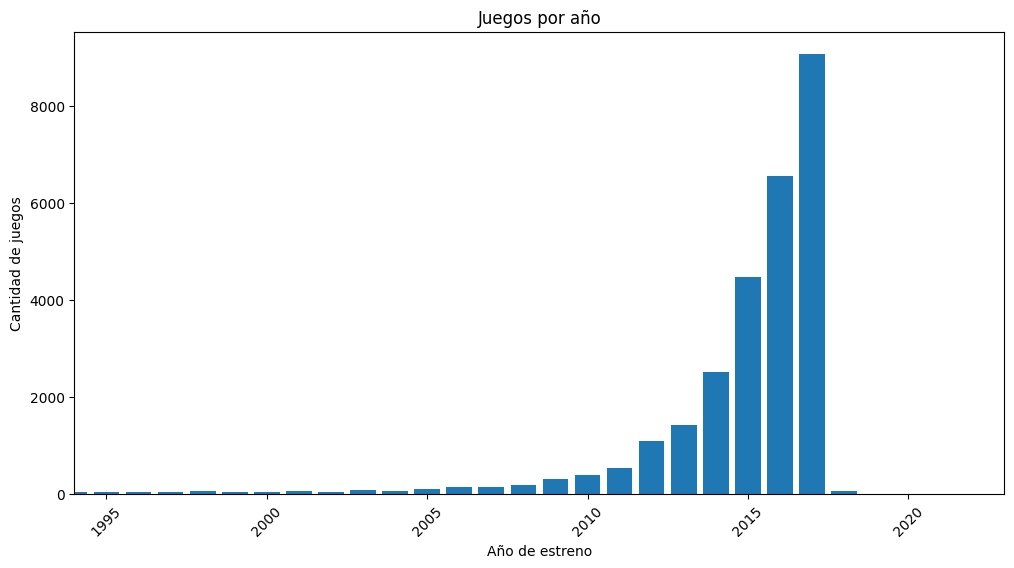

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(año_estreno_cuenta.index, año_estreno_cuenta.values)
plt.xlabel('Año de estreno')
plt.ylabel('Cantidad de juegos')
plt.title('Juegos por año')
plt.xlim(1994, 2023)
plt.xticks(rotation=45)
plt.show()

In [33]:
#Dropeo la columna release_date y me quedo con el dataframe para realizar los endpoints
fechas_válidas = fechas_válidas.drop(columns="release_date")
fechas_válidas.to_csv('cleaned_data.csv', index=False)